In [2]:
import pandas as pd
import sklearn

In [3]:
data = pd.read_csv('/home/participant/hackathon_ml/TCGA-PANCAN-HiSeq-801x20531/data.csv')
labels = pd.read_csv('/home/participant/hackathon_ml/TCGA-PANCAN-HiSeq-801x20531/labels.csv')
data.head()

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.0
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.0
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.0
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.0
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.0


In [7]:
labels = labels.set_index('Unnamed: 0')

In [4]:
data = data.set_index('Unnamed: 0')

In [36]:
feats = list(data.columns)[:1000]

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier

X = data[feats]
y = labels['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y)

pipe = make_pipeline(StandardScaler(), RandomForestClassifier(max_depth=3))

pipe.fit(X_train, y_train)
print("Train: ", pipe.score(X_train, y_train))
print("Test: ", pipe.score(X_test, y_test))

Train:  0.9883333333333333
Test:  0.9800995024875622


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.pipeline import make_pipeline

# Encode the string labels to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded)

# Create a logistic regression pipeline
pipe = make_pipeline(StandardScaler(), 
                     LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200))

# Train the model
pipe.fit(X_train, y_train)

# Evaluate the model
print("Train score: ", pipe.score(X_train, y_train))
print("Test score: ", pipe.score(X_test, y_test))


Train score:  1.0
Test score:  1.0


So both LR and RF do very well, LR better. It's likely there are a few marker genes that make the classification easy.

In [48]:
coefs = pd.DataFrame(zip(feats, pipe.named_steps['logisticregression'].coef_[0]), columns=['feature', 'coef'])
coefs.sort_values('coef')

,feature,coef
796,gene_796,-0.066733
221,gene_221,-0.066671
864,gene_864,-0.057875
499,gene_499,-0.056770
491,gene_491,-0.055967
...,...,...
83,gene_83,0.068095
238,gene_238,0.068534
545,gene_545,0.071681
706,gene_706,0.074923


<Axes: xlabel='feature'>

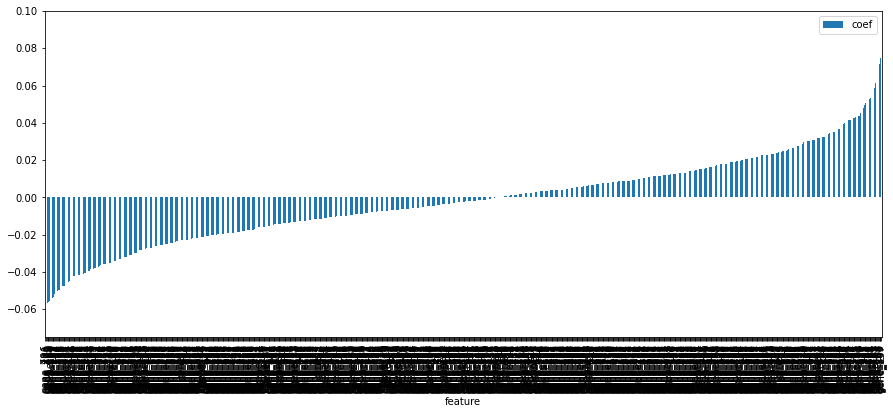

In [49]:
coefs.sort_values('coef').set_index('feature').plot(kind='bar', figsize=(15,6))

In [56]:
coefs.sort_values('coef')[-100:]

,feature,coef
59,gene_59,0.027752
333,gene_333,0.027933
299,gene_299,0.028290
911,gene_911,0.028423
328,gene_328,0.028511
...,...,...
83,gene_83,0.068095
238,gene_238,0.068534
545,gene_545,0.071681
706,gene_706,0.074923


<Axes: xlabel='gene_9565', ylabel='gene_14687'>

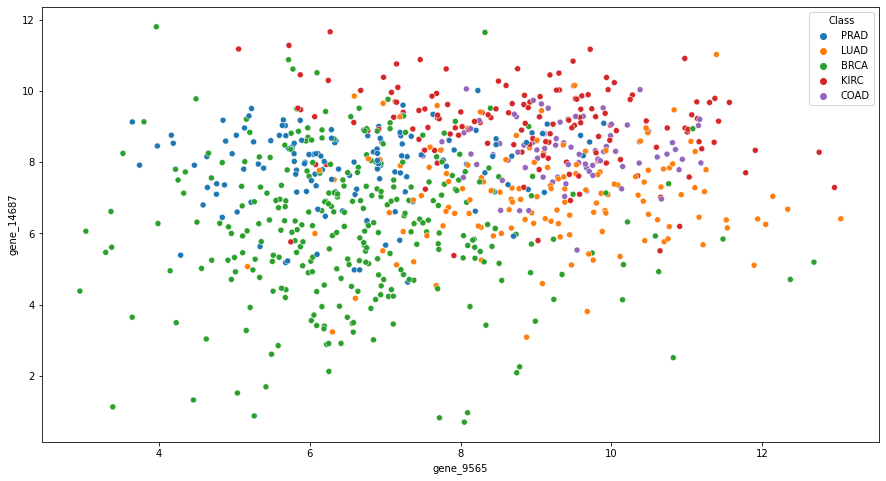

In [127]:
# plot a scatter plot of some example features to see how the classes are separated

import numpy as np

gene_1 = 'gene_9565'
gene_2 = 'gene_14687'

import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 8))

mg = data.join(labels)
sns.scatterplot(data=mg, x=gene_1, y=gene_2, hue='Class', ax=ax)

In [176]:
feats_subset = ['gene_18950', 'gene_11671', 'gene_11075', 'gene_7359',
       'gene_16877', 'gene_11051', 'gene_6314', 'gene_9788', 'gene_9617',
       'gene_14687', 'gene_2712', 'gene_12468', 'gene_9565', 'gene_19201',
       'gene_2786', 'gene_9306', 'gene_10823', 'gene_12596', 'gene_178',
       'gene_7785']

## Try different models on a subset of features

In [177]:

X = data[feats_subset]
y = labels['Class']


# Encode the string labels to numeric values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded)

# Create a logistic regression pipeline
pipe = make_pipeline(StandardScaler(), 
                     LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=200))

# Train the model
pipe.fit(X_train, y_train)

# Evaluate the model
print("Train score: ", pipe.score(X_train, y_train))
print("Test score: ", pipe.score(X_test, y_test))

Train score:  0.895
Test score:  0.8258706467661692


Let's try to visualize how the LR model is splitting the space into classes

In [178]:
means = X.mean()

genes_to_use = ['gene_9565', 'gene_14687']
ranges = [np.arange(X[i].min(), X[i].max(), 0.1) for i in genes_to_use]

results = []

for g1_val in ranges[0]:
    for g2_val in ranges[1]:
        
        input_vec = means
        input_vec[genes_to_use[0]] = g1_val
        input_vec[genes_to_use[1]] = g2_val
        
        result = pipe.predict_proba(pd.DataFrame(input_vec).T)[0][0]
        
        results.append((g1_val, g2_val, result))

Text(0, 0.5, 'BRCA class probability')

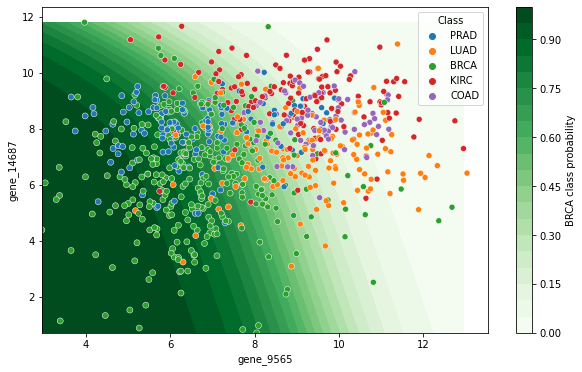

In [181]:
df = pd.DataFrame(results, columns=['x', 'y', 'result'])

import matplotlib.pyplot as plt

# Create a grid using pivot_table
df_pivot = df.pivot_table(index='y', columns='x', values='result')

# Get the x, y, and z values from the pivot table
X, Y = np.meshgrid(df_pivot.columns, df_pivot.index)
Z = df_pivot.values

fig, ax = plt.subplots(figsize=(10,6))

# Contour plot on the axes object
# Filled contour plot on the axes object (using contourf for color blocks)
contour = ax.contourf(X, Y, Z, levels=20, cmap='Greens')  # You can change cmap for different color schemes
cbar = fig.colorbar(contour, ax=ax)  # Add color bar

# Overlay scatter plot
# Assuming 'mg' is your dataframe for scatter plot, and 'gene_1', 'gene_2', and 'Class' are columns
sns.scatterplot(data=mg, x=gene_1, y=gene_2, hue='Class', ax=ax)

cbar.ax.set_ylabel('BRCA class probability')

In [190]:
!pwd

/home/participant/hackathon_ml


In [184]:
coefs = pd.DataFrame(zip(feats, pipe.named_steps['logisticregression'].coef_[0]), columns=['feature', 'coef'])
coefs.sort_values('coef')

,feature,coef
12,gene_9565,-1.512174
9,gene_14687,-1.173725
13,gene_2786,-0.778619
11,gene_12468,-0.708367
10,gene_2712,-0.596405
14,gene_9306,-0.571534
2,gene_11075,-0.310901
6,gene_6314,-0.280204
17,gene_178,-0.103229
15,gene_10823,0.000000


In [186]:
X = data[feats_subset]
y = labels['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y)

pipe = make_pipeline(StandardScaler(), RandomForestClassifier())

pipe.fit(X_train, y_train)
print("Train: ", pipe.score(X_train, y_train))
print("Test: ", pipe.score(X_test, y_test))

Train:  1.0
Test:  0.8656716417910447


In [187]:
coefs = pd.DataFrame(zip(feats, pipe.named_steps['randomforestclassifier'].feature_importances_), columns=['feature', 'coef'])
coefs.sort_values('coef')

,feature,coef
15,gene_10823,0.000000
4,gene_16877,0.000000
17,gene_178,0.003158
11,gene_12468,0.014075
5,gene_11051,0.031474
10,gene_2712,0.032217
0,gene_18950,0.032623
8,gene_9617,0.032742
1,gene_11671,0.038623
18,gene_7785,0.041768


In [188]:
means = X.mean()

genes_to_use = ['gene_9565', 'gene_14687']
ranges = [np.arange(X[i].min(), X[i].max(), 0.1) for i in genes_to_use]

results = []

for g1_val in ranges[0]:
    for g2_val in ranges[1]:
        
        input_vec = means
        input_vec[genes_to_use[0]] = g1_val
        input_vec[genes_to_use[1]] = g2_val
        
        result = pipe.predict_proba(pd.DataFrame(input_vec).T)[0][0]
        
        results.append((g1_val, g2_val, result))

Text(0, 0.5, 'BRCA class probability')

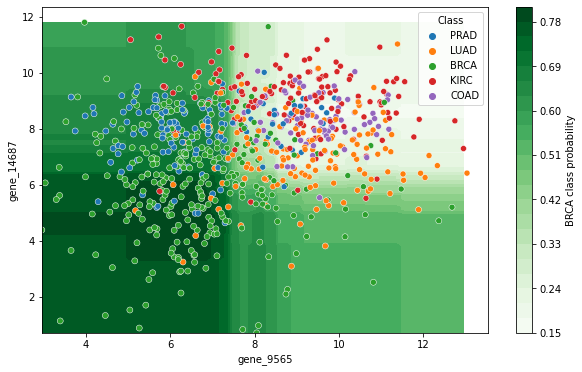

In [189]:
df = pd.DataFrame(results, columns=['x', 'y', 'result'])

import matplotlib.pyplot as plt

# Create a grid using pivot_table
df_pivot = df.pivot_table(index='y', columns='x', values='result')

# Get the x, y, and z values from the pivot table
X, Y = np.meshgrid(df_pivot.columns, df_pivot.index)
Z = df_pivot.values

fig, ax = plt.subplots(figsize=(10,6))

# Contour plot on the axes object
# Filled contour plot on the axes object (using contourf for color blocks)
contour = ax.contourf(X, Y, Z, levels=20, cmap='Greens')  # You can change cmap for different color schemes
cbar = fig.colorbar(contour, ax=ax)  # Add color bar

# Overlay scatter plot
# Assuming 'mg' is your dataframe for scatter plot, and 'gene_1', 'gene_2', and 'Class' are columns
sns.scatterplot(data=mg, x=gene_1, y=gene_2, hue='Class', ax=ax)

cbar.ax.set_ylabel('BRCA class probability')

<Axes: xlabel='gene_7359', ylabel='gene_9565'>

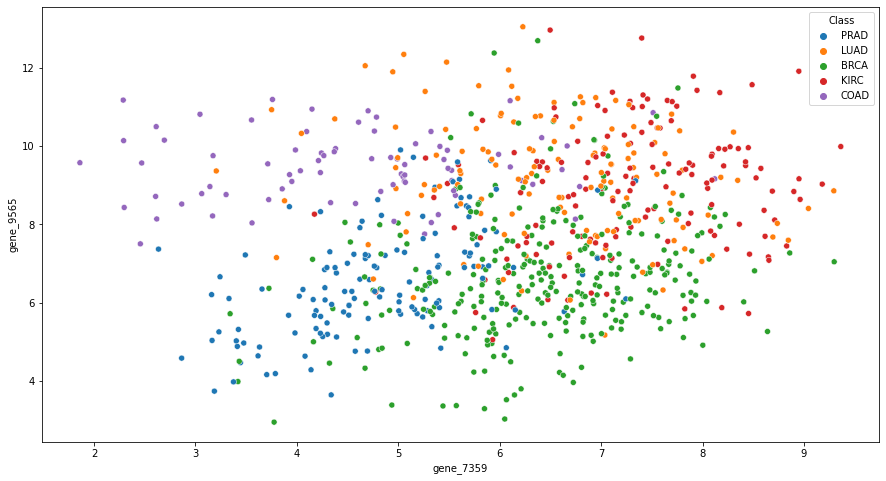

In [117]:
import numpy as np

gene_1 = 'gene_7359'
gene_2 = 'gene_9565'

import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 8))

mg = data.join(labels)
sns.scatterplot(data=mg, x=gene_1, y=gene_2, hue='Class', ax=ax)